# Chapter 3

## Figure 3.03 Michaelis-Menten kinetics

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
@parameters eT k1 km1 k2
@variables t S(t) ES(t) P(t) eFree(t) v1(t) v2(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
@named fullSys = ODESystem([
    eFree ~ eT - ES,
    v1 ~ k1 * S * eFree - km1 * ES,
    v2 ~ k2 * ES,
    D(S) ~ -v1,
    D(ES) ~ v1 - v2,
    D(P) ~ v2
])

Model fullSys with 6 equations
States (6):
  S(t)
  ES(t)
  P(t)
  eFree(t)
  v1(t)
  v2(t)
Parameters (4):
  eT
  k1
  km1
  k2

In [5]:
fullSys = structural_simplify(fullSys)

Model fullSys with 3 equations
States (3):
  S(t)
  ES(t)
  P(t)
Parameters (4):
  eT
  k1
  km1
  k2
Incidence matrix:sparse([1, 2, 3, 1, 2, 1, 2, 3], [1, 2, 3, 4, 4, 5, 5, 5], Num[×, ×, ×, ×, ×, ×, ×, ×], 3, 6)

In [6]:
# Apply QSSA on the ES complex to somplify the model
@named simpSys = ODESystem([
    D(S) ~ -k2 * eT * hill(S, (km1 + k2) / k1),
])

Model simpSys with 1 equations
States (1):
  S(t)
Parameters (4):
  eT
  k2
  k1
  km1

In [7]:
u0 = [S => 5.0, ES => 0.0, P => 0.0]
tend = 1.0
params = [eT => 1.0, k1 => 30.0, km1 => 1.0, k2 => 10.0]
sol = solve(ODEProblem(fullSys, u0, tend, params))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 40-element Vector{Float64}:
 0.0
 6.665333466693315e-6
 7.331866813362645e-5
 0.00048642648778993874
 0.001246310413218641
 0.002255916309079525
 0.0036389198801181095
 0.00545583363850392
 0.007824959232785294
 0.010840766550417302
 0.014621903142810278
 0.019277403182029782
 0.02494507816841159
 ⋮
 0.48521164547537693
 0.540201092224572
 0.5962935027711986
 0.6498572521804434
 0.6992361514843274
 0.7455747283559686
 0.7903699610737671
 0.8349926147758184
 0.8806910467990131
 0.9286579589754566
 0.9801092099749458
 1.0
u: 40-element Vector{Vector{Float64}}:
 [5.0, 0.0, 0.0]
 [4.999000802751873, 0.000999163942258781, 3.330586857606668e-8]
 [4.989074749914229, 0.010921237104096317, 4.012981675171883e-6]
 [4.930127947317353, 0.06969993676229858, 0.00017211592034861722]
 [4.832226261833521, 0.16669487025589977, 0.0010788679105792774]
 [4.720095603915227

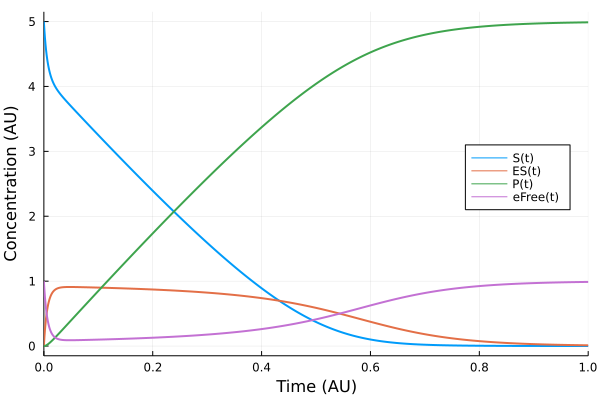

In [8]:
p1 = plot(sol, vars=[S, ES, P, eFree], xlabel="Time (AU)", ylabel="Concentration (AU)", legend=:right)

In [9]:
solsimp = solve(ODEProblem(simpSys, u0, tend, params))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 15-element Vector{Float64}:
 0.0
 0.08829951015219592
 0.29677254913999207
 0.5000004817918403
 0.6196473926569502
 0.6670104402879965
 0.7099275072236977
 0.7465737552769465
 0.7827003170612313
 0.8170029132927924
 0.8515324894037792
 0.886672833050339
 0.9240249076586415
 0.9646817171699882
 1.0
u: 15-element Vector{Vector{Float64}}:
 [5.0]
 [4.182468228248958]
 [2.3146741513235356]
 [0.7140967034844039]
 [0.13296503742668356]
 [0.04630251318211275]
 [0.01563176152085844]
 [0.005910624946093232]
 [0.0022299119031116642]
 [0.0008784935956950156]
 [0.0003432014396268349]
 [0.00013175528732374206]
 [4.7615961869066056e-5]
 [1.5733009181704544e-5]
 [6.007498451479797e-6]

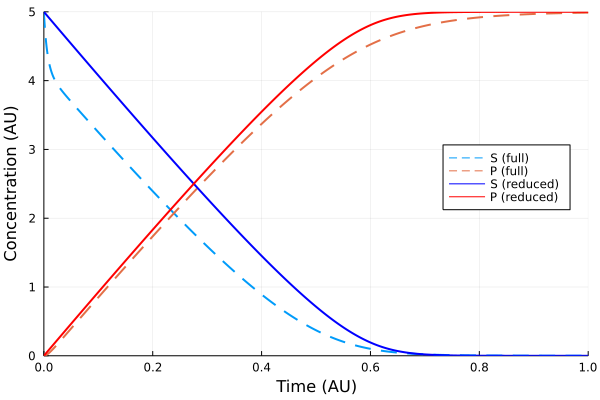

In [10]:
p2 = plot(sol, vars=[1, 3], line=(:dash), label=["S (full)" "P (full)"])
plot!(p2, solsimp, line=(:blue), lab="S (reduced)")
plot!(p2, solsimp, vars=((t, s)->(t, 5.0 - s), 0, 1), line=(:red), lab="P (reduced)")
plot!(p2, xlabel="Time (AU)",  ylabel="Concentration (AU)", xlims=(0.0,1.0), ylims=(0.0,5.0), legend = :right)

## Problem 3.7.5 Reduced Michaelis-Menten

In [11]:
using Plots
using DifferentialEquations
using ModelingToolkit
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [12]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
reducedmm(x, k) = x / k

reducedmm (generic function with 1 method)

In [13]:
@parameters v_0 v_m1 v_m2 v_m3 Km_1 Km_2 Km_3
@variables t S1(t) S2(t) S3(t) v1(t) v2(t) v3(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [14]:
eqsFull = [ v1 ~ v_m1 * hill(S1, Km_1),
            v2 ~ v_m2 * hill(S2, Km_2),
            v3 ~ v_m3 * hill(S3, Km_3),
            D(S1) ~ v_0 - v1,
            D(S2) ~ v1 - v2,
            D(S3) ~ v2 - v3]

@named fullsys = ODESystem(eqsFull)
fullSys = structural_simplify(fullsys)

Model fullsys with 3 equations
States (3):
  S1(t)
  S2(t)
  S3(t)
Parameters (7):
  Km_1
  v_m1
  v_m2
  Km_2
  Km_3
  v_m3
⋮
Incidence matrix:sparse([1, 2, 3, 1, 2, 2, 3, 3], [1, 2, 3, 4, 4, 5, 5, 6], Num[×, ×, ×, ×, ×, ×, ×, ×], 3, 6)

In [15]:
eqsRe =   [ v1 ~ v_m1 * S1 / Km_1,
            v2 ~ v_m2 * S2 / Km_2,
            v3 ~ v_m3 * S3 / Km_3,
            D(S1) ~ v_0 - v1,
            D(S2) ~ v1 - v2,
            D(S3) ~ v2 - v3]
@named reSys = ODESystem(eqsRe)
reSys = structural_simplify(reSys)

Model reSys with 3 equations
States (3):
  S1(t)
  S2(t)
  S3(t)
Parameters (7):
  Km_1
  v_m1
  v_m2
  Km_2
  Km_3
  v_m3
⋮
Incidence matrix:sparse([1, 2, 3, 1, 2, 2, 3, 3], [1, 2, 3, 4, 4, 5, 5, 6], Num[×, ×, ×, ×, ×, ×, ×, ×], 3, 6)

In [16]:
u0 = [S1 => 0.3, S2 => 0.2, S3 => 0.1]
tend = 2.0
params = [v_0 => 2, v_m1 => 9, v_m2 => 12, v_m3 => 15, Km_1 => 1.0, Km_2 => 0.4, Km_3 => 3.0]

7-element Vector{Pair{Num, Float64}}:
  v_0 => 2.0
 v_m1 => 9.0
 v_m2 => 12.0
 v_m3 => 15.0
 Km_1 => 1.0
 Km_2 => 0.4
 Km_3 => 3.0

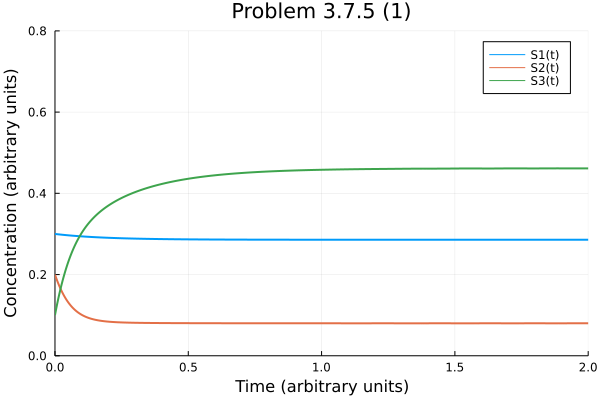

In [17]:
sol1 = solve(ODEProblem(fullSys, u0, tend, params))

plot(sol1, ylims=(0.0, 0.8),
     title="Problem 3.7.5 (1)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)")

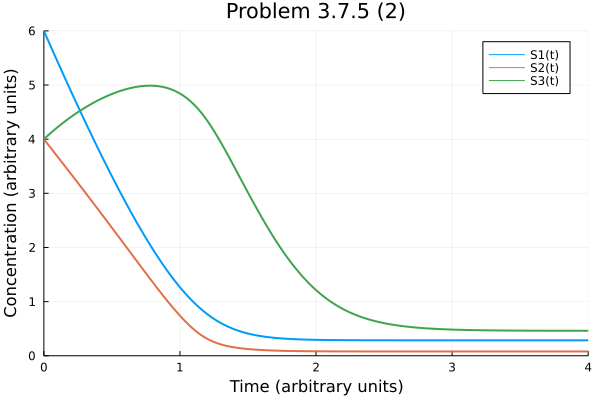

In [18]:
u1 = [S1=>6.0, S2=>4.0, S3=>4.0]
sol2 = solve(ODEProblem(fullSys, u1, 4.0, params))

plot(sol2, ylims=(0.0, 6.0),
     title="Problem 3.7.5 (2)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)")

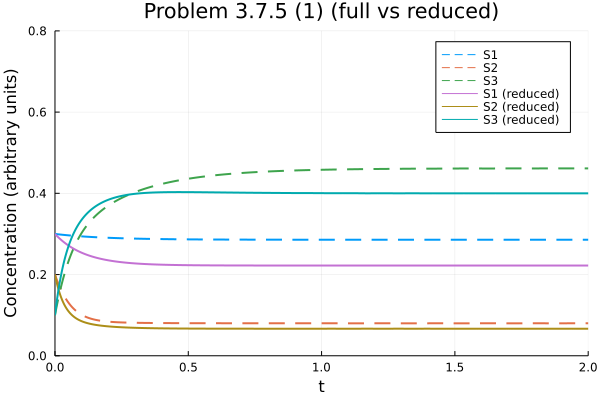

In [19]:
sol3 = solve(ODEProblem(reSys, u0, tend, params))

p3 = plot(sol1, ylims=(0.0, 0.8),
     title="Problem 3.7.5 (1) (full vs reduced)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)",
     labels=["S1 " "S2 " "S3 "], ls=:dash)
plot!(p3, sol3, labels=["S1 (reduced)" "S2 (reduced)" "S3 (reduced)"] )

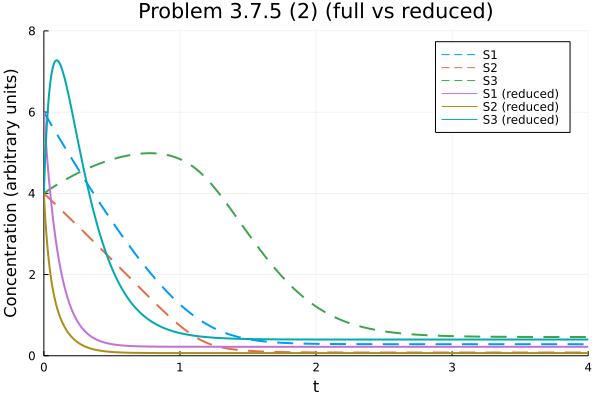

In [20]:
sol4 = solve(ODEProblem(reSys, u1, 4.0, params))
p4 = plot(sol2, ylims=(0.0, 8.0),
     title="Problem 3.7.5 (2) (full vs reduced)",
     xlabel="Time (arbitrary units)",
     ylabel="Concentration (arbitrary units)",
     labels=["S1 " "S2 " "S3 "], ls=:dash)
plot!(p4, sol4, labels=["S1 (reduced)" "S2 (reduced)" "S3 (reduced)"] )